<a href="https://www.kaggle.com/code/iftekhi/bdapplication-assessment-01?scriptVersionId=161184375" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Import All necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   

**Loading The Dataset**

In [2]:
path = '/kaggle/input/chariot-oil-gas/CHAR.L.csv'

df = pd.read_csv(path, parse_dates = ['Date'])
df.head()

,Date,Close
0,2019-01-01,2.7163
1,2019-01-02,2.7014
2,2019-01-03,2.3226
3,2019-01-04,4.4359
4,2019-01-05,4.7349


In [3]:
df.rename(columns={"Close": "Close Price"}, inplace=True)

In [4]:
df.isnull().sum()

Date           0
Close Price    0
dtype: int64

In [5]:
df.head()

,Date,Close Price
0,2019-01-01,2.7163
1,2019-01-02,2.7014
2,2019-01-03,2.3226
3,2019-01-04,4.4359
4,2019-01-05,4.7349


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         60 non-null     datetime64[ns]
 1   Close Price  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


> As we can see the day is same for all dates So we can drop day and keep year and mo

In [7]:
df['Date'] = df['Date'].dt.strftime('%Y-%d-%m')

In [8]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

/tmp/ipykernel_19/1694556585.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)


In [9]:
df = df.set_index('Date')
df.tail()

,Close Price
Date,
2023-08-01,14.900000
2023-09-01,16.299999
2023-10-01,14.220000
2023-11-01,14.300000
2023-12-01,13.700000


In [10]:
df.tail()

,Close Price
Date,
2023-08-01,14.900000
2023-09-01,16.299999
2023-10-01,14.220000
2023-11-01,14.300000
2023-12-01,13.700000


**EDA**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close Price,60.0,9.262783,6.170219,1.4703,3.7605,7.75135,15.1625,22.6


In [12]:
df['Close Price'].median()

7.75135

In [13]:
df['Close Price'].mode()

0    19.4
Name: Close Price, dtype: float64

A small variance indicates that the data points tend to be very close to the mean, and to each other. A high variance indicates that the data points are very spread out from the mean, and from one another. Variance is the average of the squared distances from each point to the mean.

In [14]:
df['Close Price'].var()

38.071603217683645

In statistics, the standard deviation is a measure of the amount of variation of a random variable expected about its mean. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range. A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean (more reliable). on average, the distance between each data point in an entire dataset is different from the mean of the dataset by a value of 5.

In [15]:
df['Close Price'].std()

6.170219057511949

/tmp/ipykernel_19/325198776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close Price'], bins=10, hist=True, kde=True, label = 'Close Price', color = 'blue')


<Axes: xlabel='Close Price', ylabel='Density'>

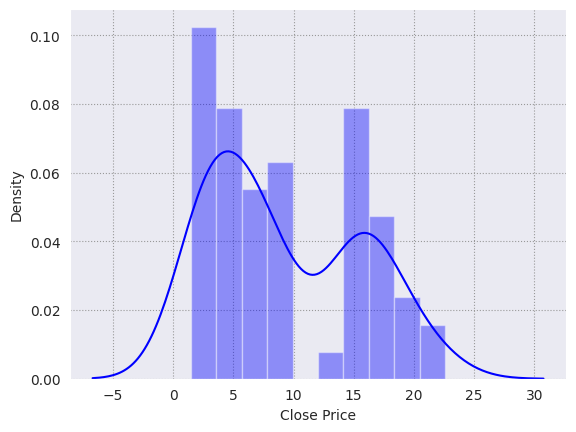

In [16]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.distplot(df['Close Price'], bins=10, hist=True, kde=True, label = 'Close Price', color = 'blue')

**Skewness**

In [17]:
df['Close Price'].skew()

0.4508575222650349

The data are fairly symmetrical. 

In [18]:
print('Skewness:', df['Close Price'].skew().round(3))
print('Kurtosis:', df['Close Price'].kurt().round(3))

Skewness: 0.451
Kurtosis: -1.199


**Kurtosis**

In [19]:
df['Close Price'].kurt()

-1.199302446026277

Platykurtic curve bcz 

<Axes: ylabel='Density'>

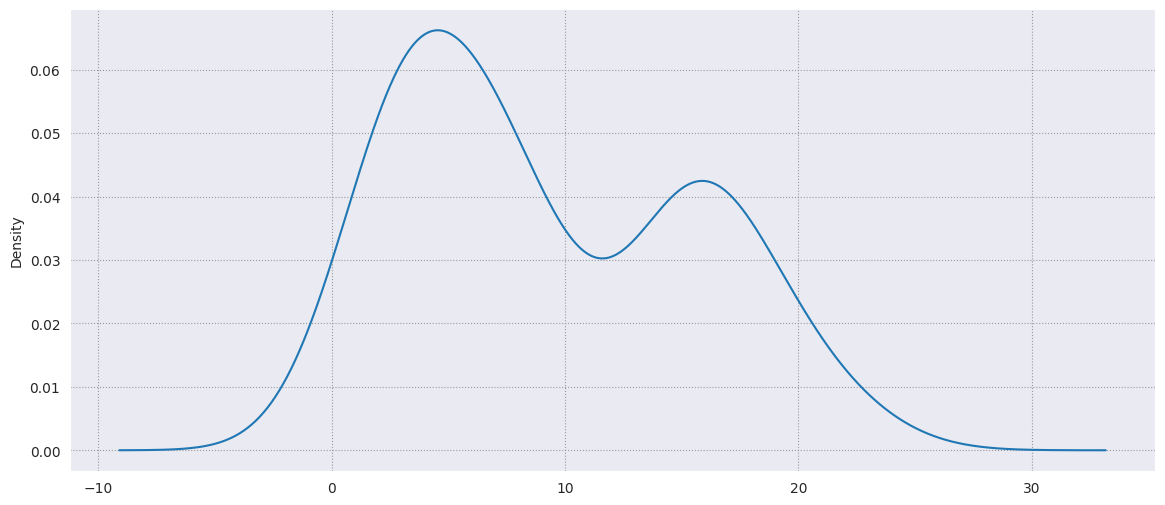

In [20]:
df['Close Price'].plot(kind='kde', figsize=(14,6))

<Axes: >

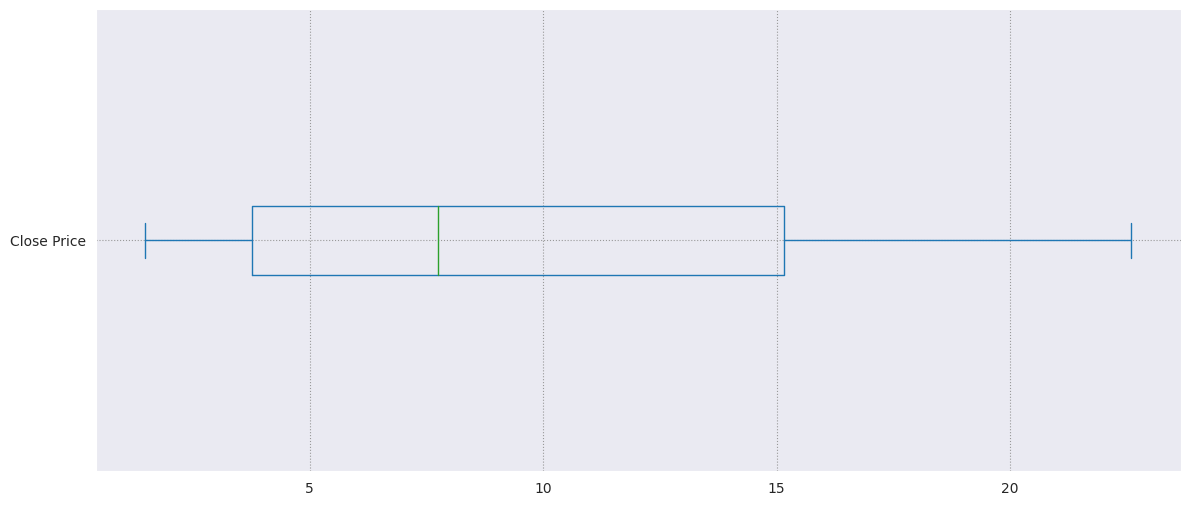

In [21]:
df['Close Price'].plot(kind='box', vert=False, figsize=(14,6))

**Time Series Visualization**

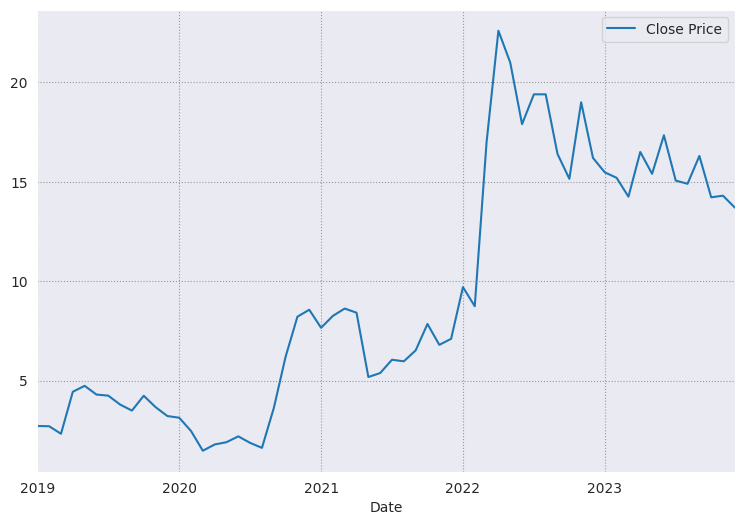

In [22]:
df.plot(figsize=(9,6))
plt.show()

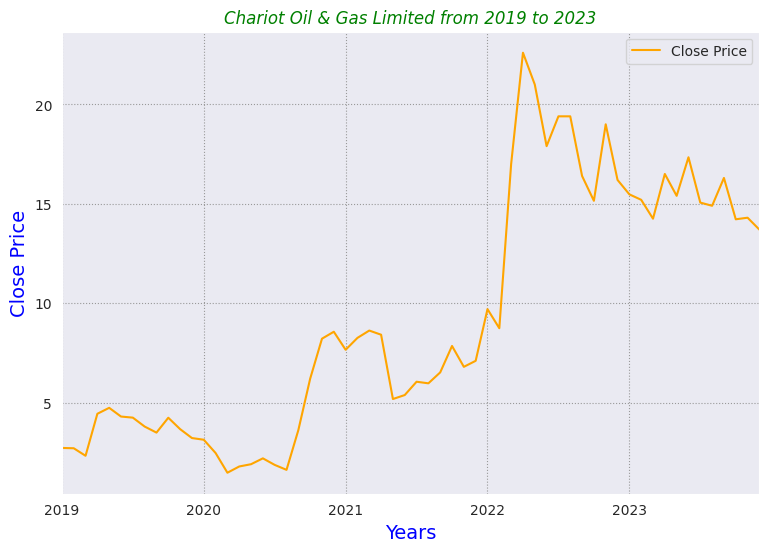

In [23]:
ax = df.plot(color='orange', figsize=(9,6))
ax.set_xlabel('Years', color = 'blue', fontsize = 14)
ax.set_ylabel('Close Price', color = 'blue', fontsize = 14)
ax.set_title('Chariot Oil & Gas Limited from 2019 to 2023', color='green', fontstyle = 'italic')
plt.show()

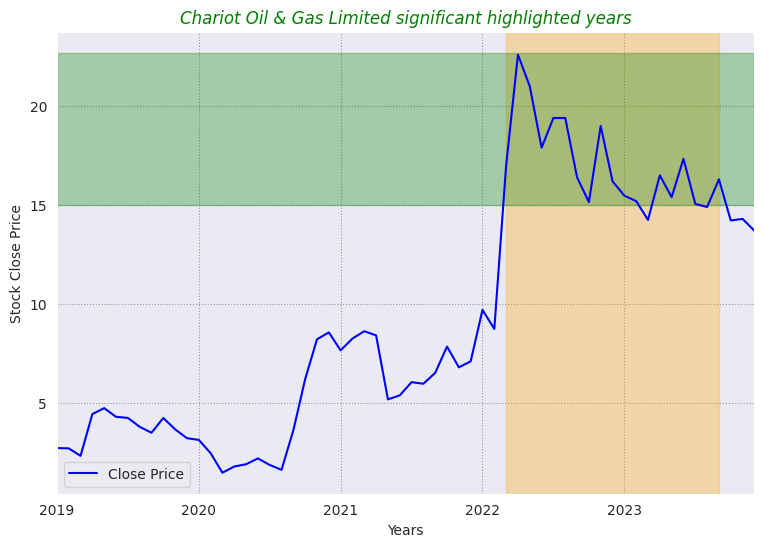

In [24]:
# Highlighting regions of interest
ax = df.plot(color='blue', figsize=(9,6))
ax.set_xlabel('Years')
ax.set_ylabel('Stock Close Price')
ax.set_title('Chariot Oil & Gas Limited significant highlighted years', color='green', fontstyle = 'italic')
ax.axvspan('2022-03-01', '2023-09-01', color='orange', alpha=0.3)
ax.axhspan(15, 22.7, color='green', alpha=0.3)

**Autocorrelation and Partial Autocorrelation**

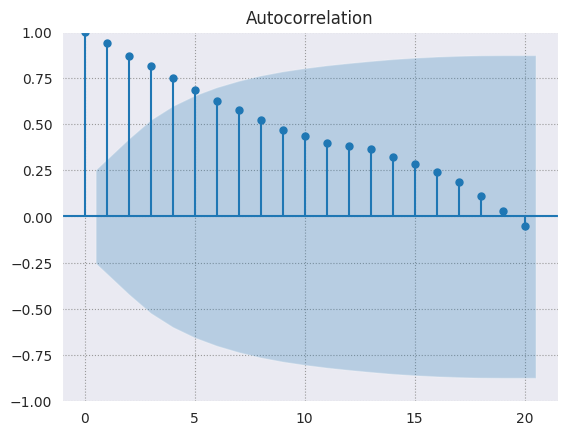

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df['Close Price'], lags=20)
plt.show()

Since autocorrelation is a correlation measure, the autocorrelation coefficient can only take values between -1 and 1. An autocorrelation of 0 indicates no correlation, while 1 and -1 indicate strong positive and negetive correlations.

Hints: They are highly correlated and statistically significant.

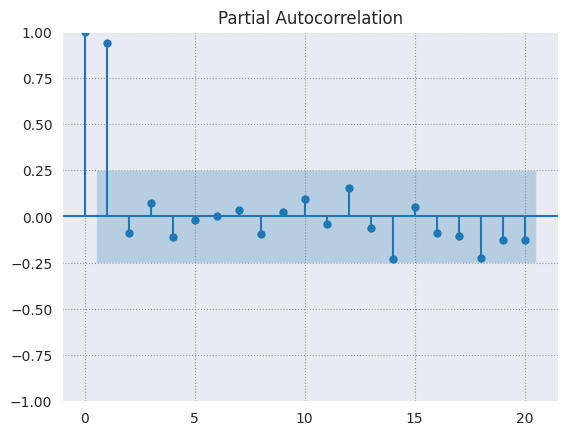

In [26]:
# Plotting partial autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(df['Close Price'], lags=20)
plt.show()

If partial autocorrelation values are close to 0, you can conclude that values are not correlated with one another. Inversely, partial autocorrelations that have values close to 1 or -1 indicate that there exist strong positive or negative correlations between the lagged observations of the time series.

If partial autocorrelation values are beyond the margins of uncertainty, which are marked by the blue-shaded regions, then you can assume that the observed partial autocorrelation values are statistically significant.

**Time Series Decomposition**

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [28]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Close Price'], model='multiplicative')

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Close Price'], model='additive')

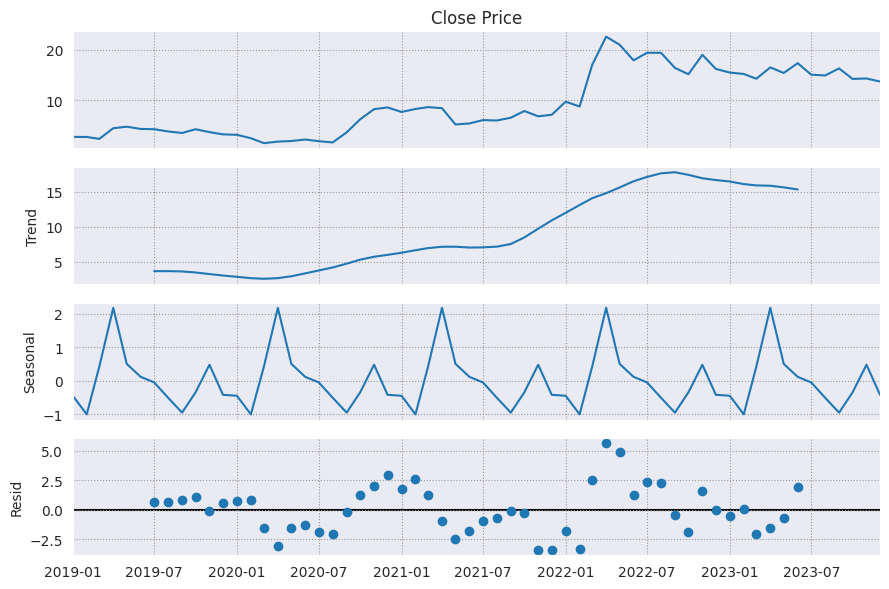

In [29]:
additive_decomposition = seasonal_decompose(df['Close Price'], model='additive')
fig = additive_decomposition.plot()
fig.set_size_inches((9,6))
fig.tight_layout()
plt.show()

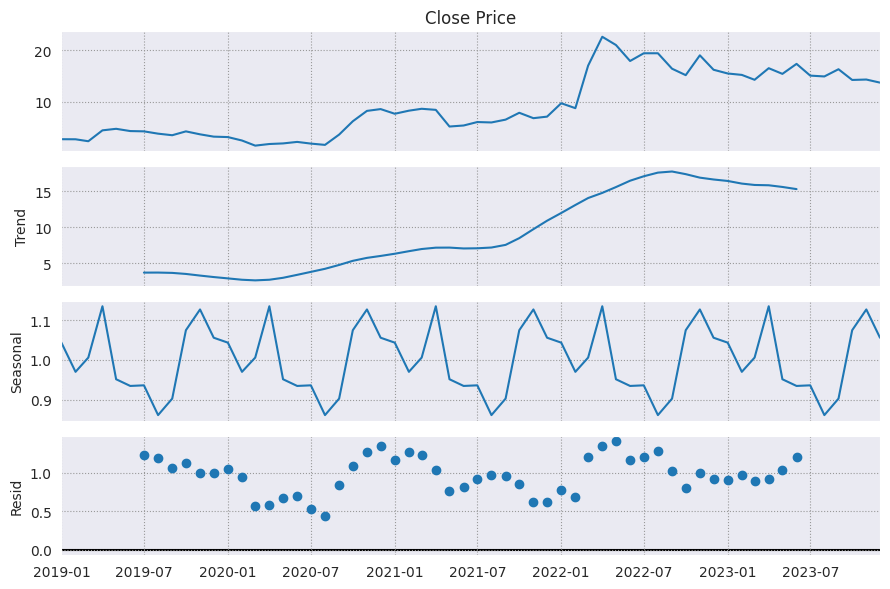

In [30]:
multiplicative_decomposition = seasonal_decompose(df['Close Price'], model='multiplicative')
fig = multiplicative_decomposition.plot()
fig.set_size_inches((9,6))
fig.tight_layout()
plt.show()

# Time Series Forecasting Methods

In [31]:
t_len1 = 54
train_set1 = df[0:t_len1] 
test_set1 = df[t_len1:]

In [32]:
t_len2 = 48
train_set2 = df[0:t_len2] 
test_set2 = df[t_len2:]

**Naive Method Function**

In [33]:
def naive_method(data, nforecast):
    """
    Forecast using the Naive Method.
    
    Parameters:
        data (list): A list of historical data points.
        nforecast: number of forecasts you want to make
        
    Returns:
        forecast (list): A list of forecasts for each period.
    """
    forecast = [data[-1]]  # Initial forecast is the last observed point
    number = nforecast-1 # You can adjust the number of forecast you want to make.
    
    # To forecast the next 24 points, a loop is necessary:
    for i in range(number):
         forecast.append(forecast[-i])
    
    return forecast

In [34]:
y_hat_naive1 = test_set1.copy()
y_hat_naive1['naive_forecast'] = naive_method(train_set1['Close Price'], nforecast = 6)

In [35]:
y_hat_naive2 = test_set2.copy()
y_hat_naive2['naive_forecast'] = naive_method(train_set2['Close Price'], nforecast = 12)

In [36]:
y_hat_naive1.head()

,Close Price,naive_forecast
Date,,
2023-07-01,15.060000,17.34
2023-08-01,14.900000,17.34
2023-09-01,16.299999,17.34
2023-10-01,14.220000,17.34
2023-11-01,14.300000,17.34


In [37]:
y_hat_naive2.head()

,Close Price,naive_forecast
Date,,
2023-01-01,15.475,16.200001
2023-02-01,15.200,16.200001
2023-03-01,14.250,16.200001
2023-04-01,16.500,16.200001
2023-05-01,15.400,16.200001


**Graph for train dataset and Test dataset**

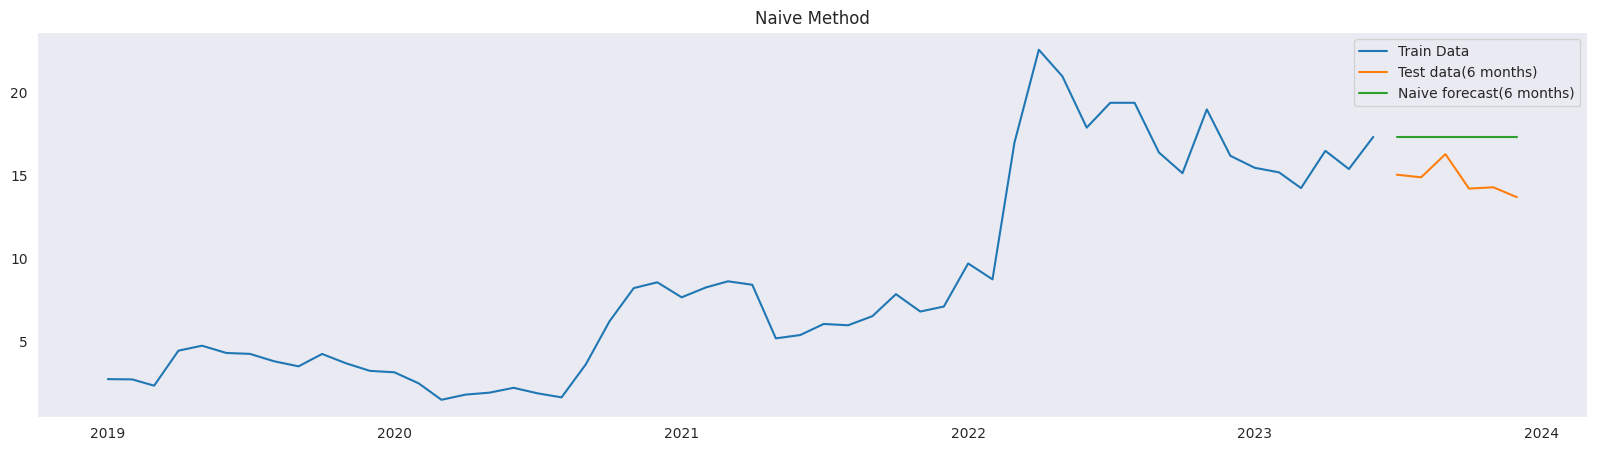

In [38]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set1['Close Price'], label='Train Data')
plt.plot(test_set1['Close Price'], label='Test data(6 months)')
plt.plot(y_hat_naive1['naive_forecast'], label='Naive forecast(6 months)')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

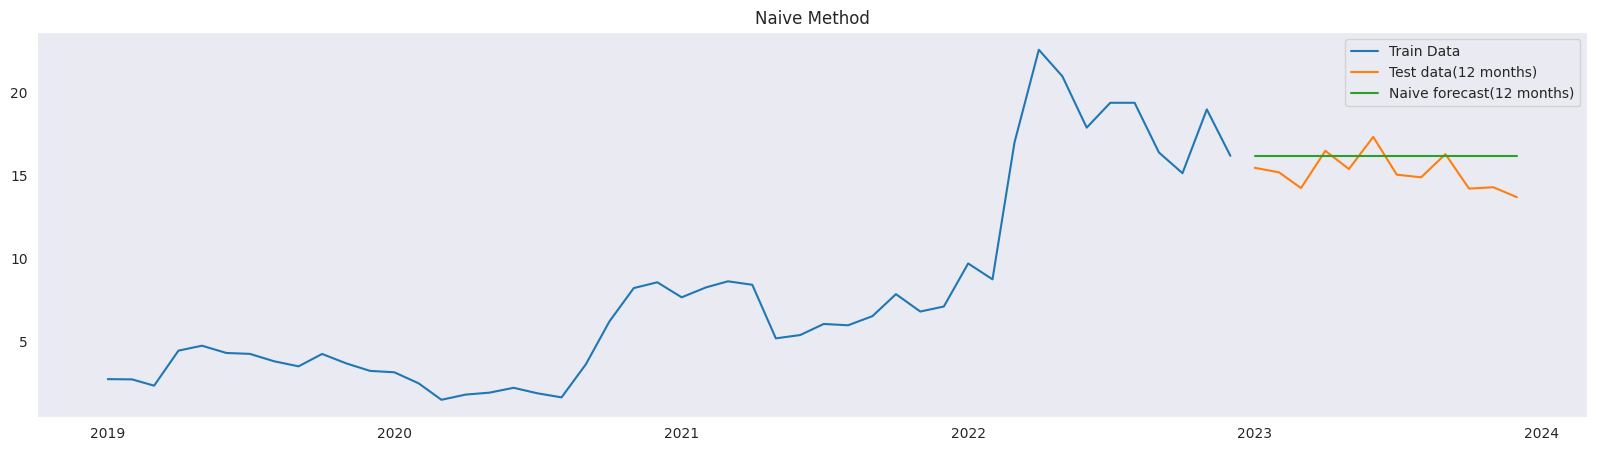

In [39]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set2['Close Price'], label='Train Data')
plt.plot(test_set2['Close Price'], label='Test data(12 months)')
plt.plot(y_hat_naive2['naive_forecast'], label='Naive forecast(12 months)')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Accurcary metrics

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set1['Close Price'], y_hat_naive1['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set1['Close Price']-y_hat_naive1['naive_forecast'])/test_set1['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set1['Close Price']-y_hat_naive1['naive_forecast'])),2)

results = pd.DataFrame({'Method':['Naive method(6 Months)'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Naive method(6 Months),2.72,2.59,17.94


In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_naive2['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_naive2['naive_forecast'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_naive2['naive_forecast'])),2)

results = pd.DataFrame({'Method':['Naive method(12 Months)'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Naive method(12 Months),1.42,1.24,8.41


## Average of all historical data Method

In [42]:
def average_historical_method(data, nforecast):
    """
    Forecast using the average of all historical values Method.
    
     Parameters:
        data (list): A list of historical data points.
        nforecast: number of forecasts you want to make
        
    Returns:
        forecast (list): A list of forecasts for each period.
        
    """
    average = sum(data) / len(data)  # Calculate the average of historical data
    forecast = [average] * nforecast  # Create a list of forecasts with the same average value
        
    return forecast

In [43]:
y_hat_average_hist1 = test_set1.copy()
y_hat_average_hist1['average_hist_forecast'] = average_historical_method(train_set1['Close Price'], nforecast = 6)

In [44]:
y_hat_average_hist2 = test_set2.copy()
y_hat_average_hist2['average_hist_forecast'] = average_historical_method(train_set2['Close Price'], nforecast = 12)

In [45]:
round(y_hat_average_hist1,2).head()

,Close Price,average_hist_forecast
Date,,
2023-07-01,15.06,8.65
2023-08-01,14.90,8.65
2023-09-01,16.30,8.65
2023-10-01,14.22,8.65
2023-11-01,14.30,8.65


In [46]:
round(y_hat_average_hist2,2).head()

,Close Price,average_hist_forecast
Date,,
2023-01-01,15.48,7.77
2023-02-01,15.20,7.77
2023-03-01,14.25,7.77
2023-04-01,16.50,7.77
2023-05-01,15.40,7.77


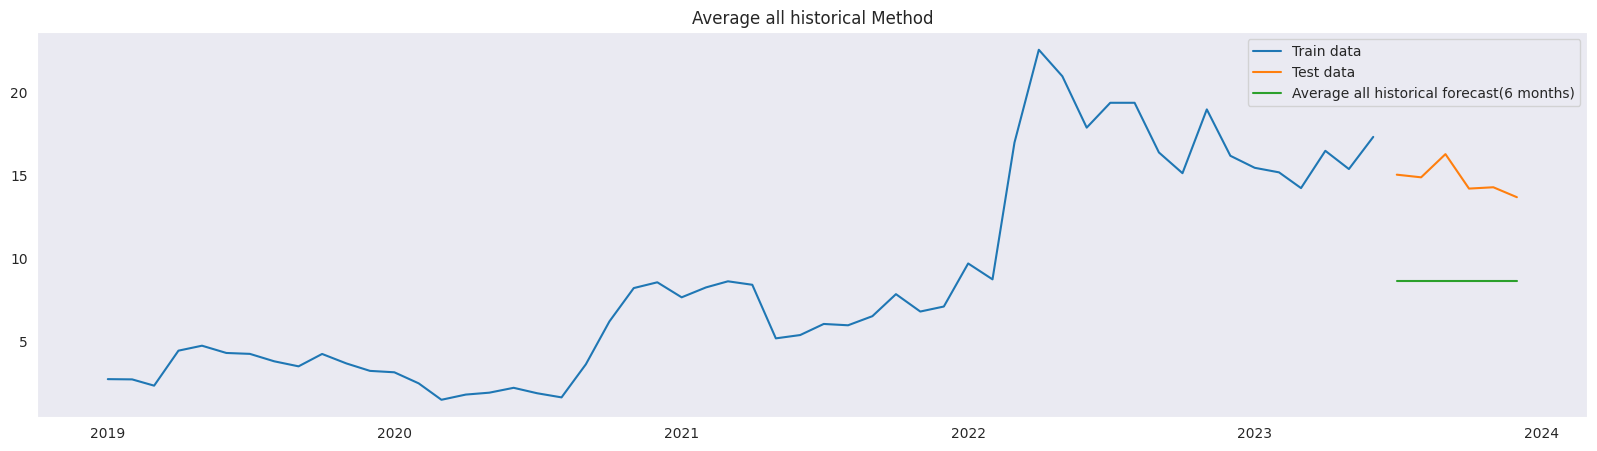

In [47]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set1['Close Price'], label='Train data')
plt.plot(test_set1['Close Price'], label='Test data')
plt.plot(y_hat_average_hist1['average_hist_forecast'], label='Average all historical forecast(6 months)')
plt.legend(loc='best')
plt.title('Average all historical Method')
plt.show()

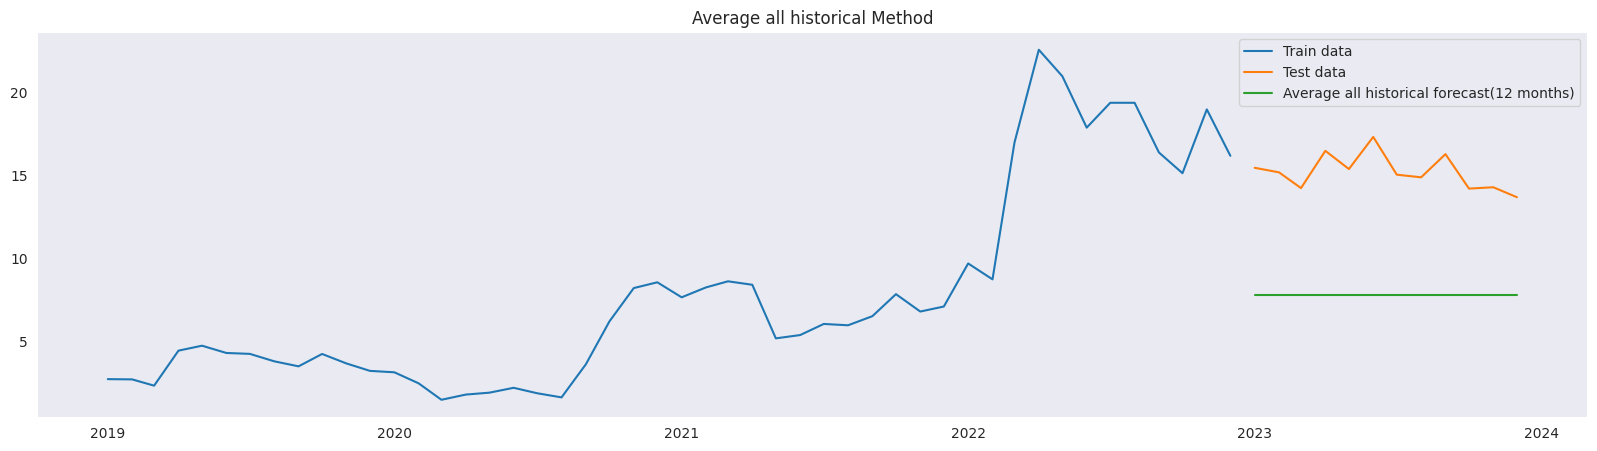

In [48]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set2['Close Price'], label='Train data')
plt.plot(test_set2['Close Price'], label='Test data')
plt.plot(y_hat_average_hist2['average_hist_forecast'], label='Average all historical forecast(12 months)')
plt.legend(loc='best')
plt.title('Average all historical Method')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set1['Close Price'], y_hat_average_hist1['average_hist_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set1['Close Price']-y_hat_average_hist1['average_hist_forecast'])/test_set1['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set1['Close Price']-y_hat_average_hist1['average_hist_forecast'])),2)

results = pd.DataFrame({'Method':['Average all historical Method(6 months)'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Average all historical Method(6 months),6.15,6.09,41.14


In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_average_hist2['average_hist_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_average_hist2['average_hist_forecast'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_average_hist2['average_hist_forecast'])),2)

results = pd.DataFrame({'Method':['Average all historical Method(12 months)'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Average all historical Method(12 months),7.52,7.45,48.7


**Simple Moving Averages method**

In [51]:
y_hat_MA_meth = test_set2.copy()

# MA method
ma_window = 12 # the size of the moving window
y_hat_MA_meth['moving_avg_forecast'] = train_set2['Close Price'].rolling(ma_window).mean().iloc[-1]

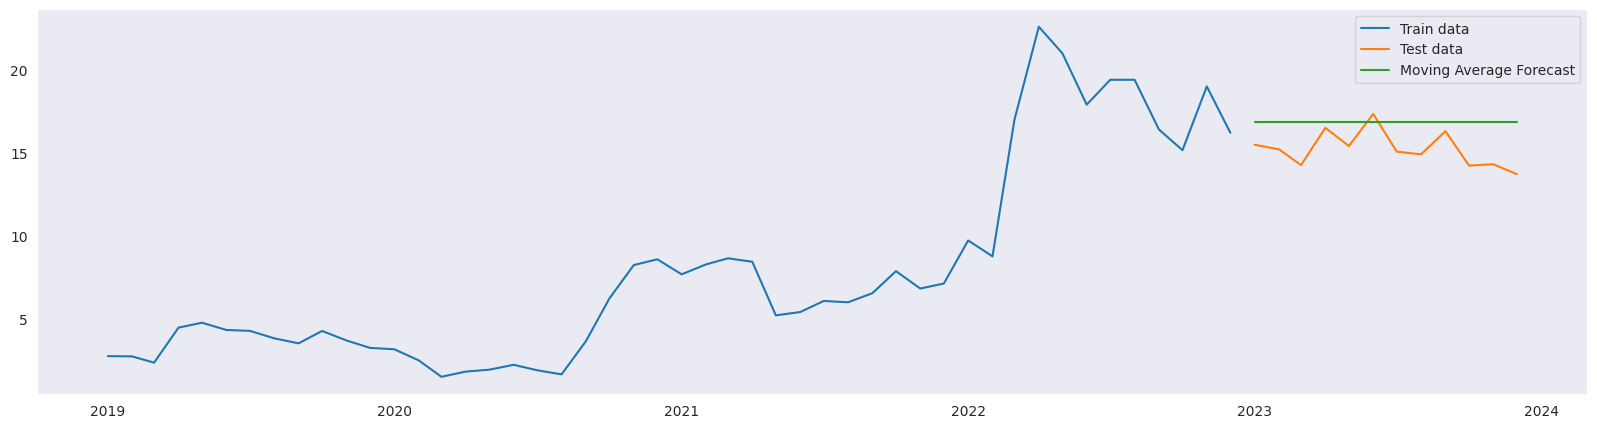

In [52]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set2['Close Price'], label='Train data')
plt.plot(test_set2['Close Price'], label='Test data')
plt.plot(y_hat_MA_meth['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_MA_meth['moving_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_MA_meth['moving_avg_forecast'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_MA_meth['moving_avg_forecast'])),2)

results = pd.DataFrame({'Method':['Simple Moving Averages method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Simple Moving Averages method,1.95,1.73,11.8


Exponential Smoothing methods¶

### Simple or Single Exponential Smoothing method
Simple or single exponential smoothing (SES) is the method of time series forecasting used with univariate data with no trend and no seasonal pattern. It needs a single parameter called alpha, also known as the smoothing factor. Alpha controls the rate at which the influence of past observations decreases exponentially. The parameter is often set to a value between 0 and 1.   

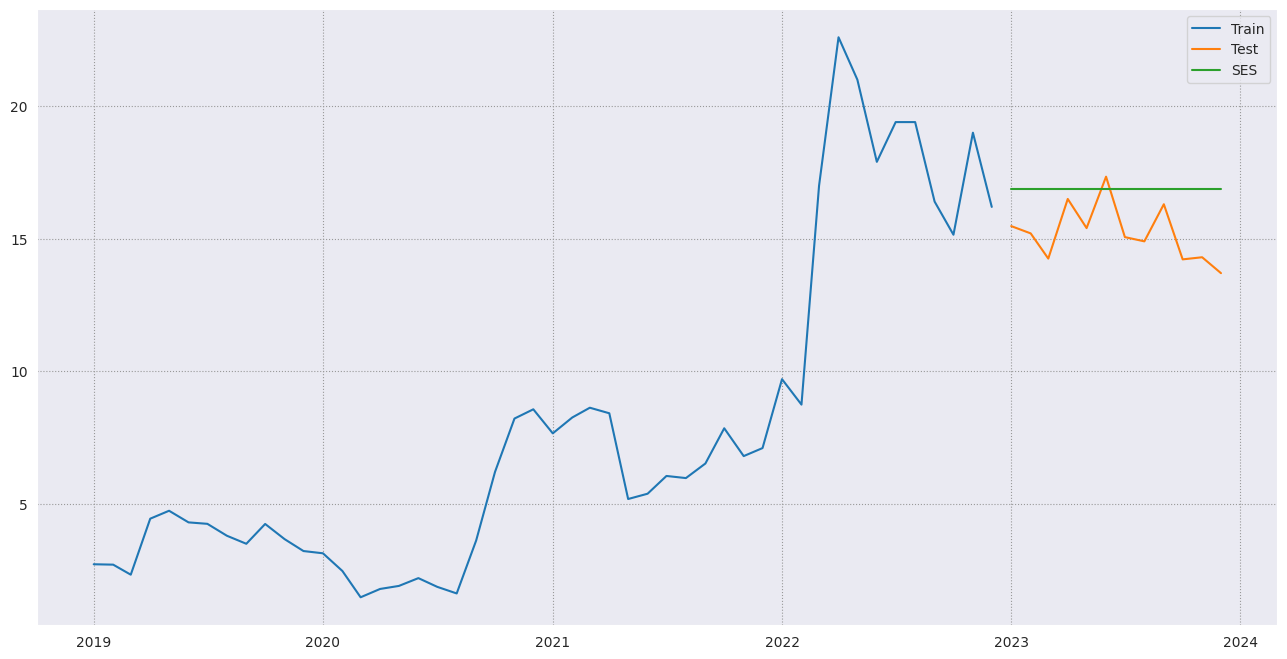

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

alpha = 0.6

y_hat_avg = test_set2.copy()

# Function SimpleExpSmoothing represents the method

fit2 = SimpleExpSmoothing(np.asarray(train_set2['Close Price'])).fit(smoothing_level=alpha, optimized=False)
#fit2 = SimpleExpSmoothing(np.asarray(train['Number of Passengers'])).fit() # Here statsmodels to automatically find 
                                                                            # an optimized value of alphafor us

y_hat_avg['SES'] = fit2.forecast(len(test_set2)) # number of forecasting equal to the test size

plt.figure(figsize=(16,8))
plt.plot(train_set2['Close Price'], label='Train')
plt.plot(test_set2['Close Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_avg['SES'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['SES'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['SES'])),2)

results = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Simple Exponential Smoothing,1.93,1.72,11.72


### Holt’s Linear Trend method

This method is known as Holt's trend model or second-order exponential smoothing. Double exponential smoothing is used in time-series forecasting when the data has a linear trend but no seasonal pattern. The basic idea here is to introduce a term that can consider the possibility of the series exhibiting some trend. 

In addition to the alpha parameter, Double exponential smoothing needs another smoothing factor called beta (b), which controls the decay of the influence of change in trend. The method supports trends that change in additive ways (smoothing with linear trend) and trends that change in multiplicative ways (smoothing with exponential trend). 

/tmp/ipykernel_19/1217458271.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train_set2['Close Price'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


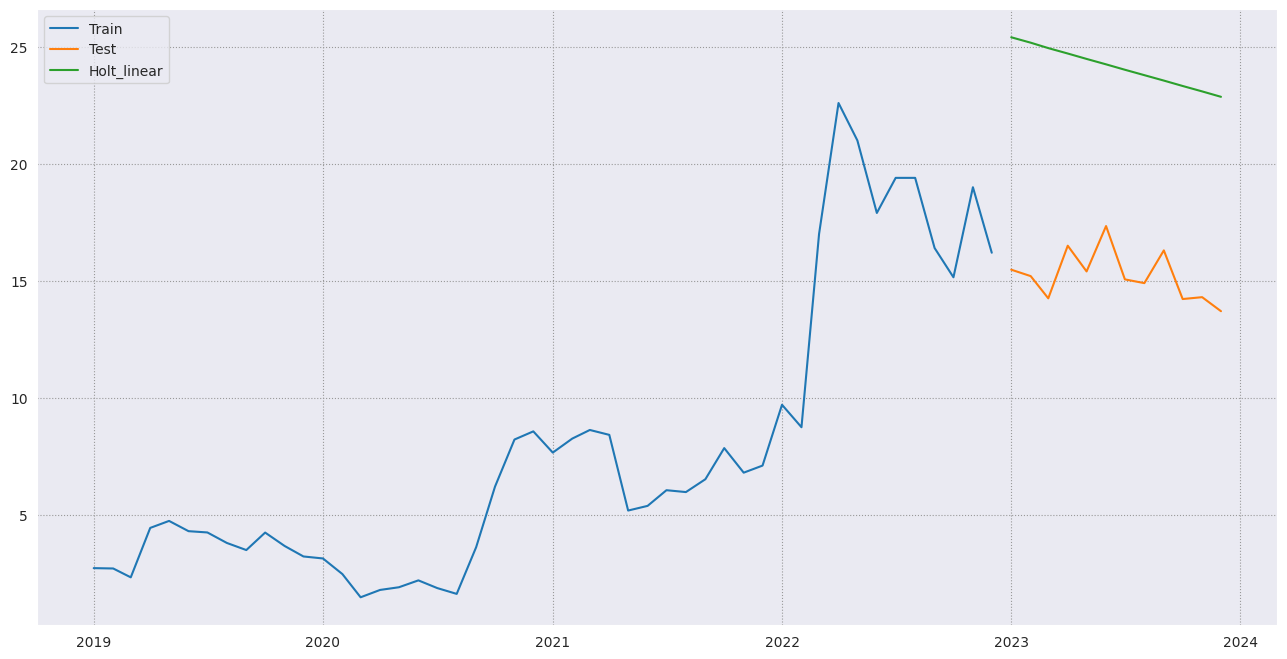

In [56]:
y_hat_avg = test_set2.copy()

fit1 = Holt(np.asarray(train_set2['Close Price'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)
#fit1 = Holt(np.asarray(train['Number of Passengers'])).fit() # statsmodels to automatically optimized the values

y_hat_avg['Holt_linear'] = fit1.forecast(len(test_set2))

plt.figure(figsize=(16,8))
plt.plot(train_set2['Close Price'], label='Train')
plt.plot(test_set2['Close Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [57]:
fit1.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.9,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2.7163,
 'initial_trend': -0.014899999999999913,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_avg['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['Holt_linear'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Linear,8.98,8.92,59.15


### Holt-Winters Method

This method is the variation of exponential smoothing that's most advanced and is used for time series forecasting when the data has linear trends and seasonal patterns. The technique applies exponential smoothing three times – level smoothing, trend smoothing, and seasonal smoothing. A new smoothing parameter called gamma (g) is added to control the influence of the seasonal component.  

The triple exponential smoothing method is called Holt-Winters Exponential Smoothing, named after its contributors, Charles Holt and Peter Winters.

Holt-Winters Exponential Smoothing has two categories depending on the nature of the seasonal component:

Holt-Winter's Additive Method − for seasonality that is addictive.
Holt-Winter's Multiplicative Method – for seasonality that is multiplicative. 

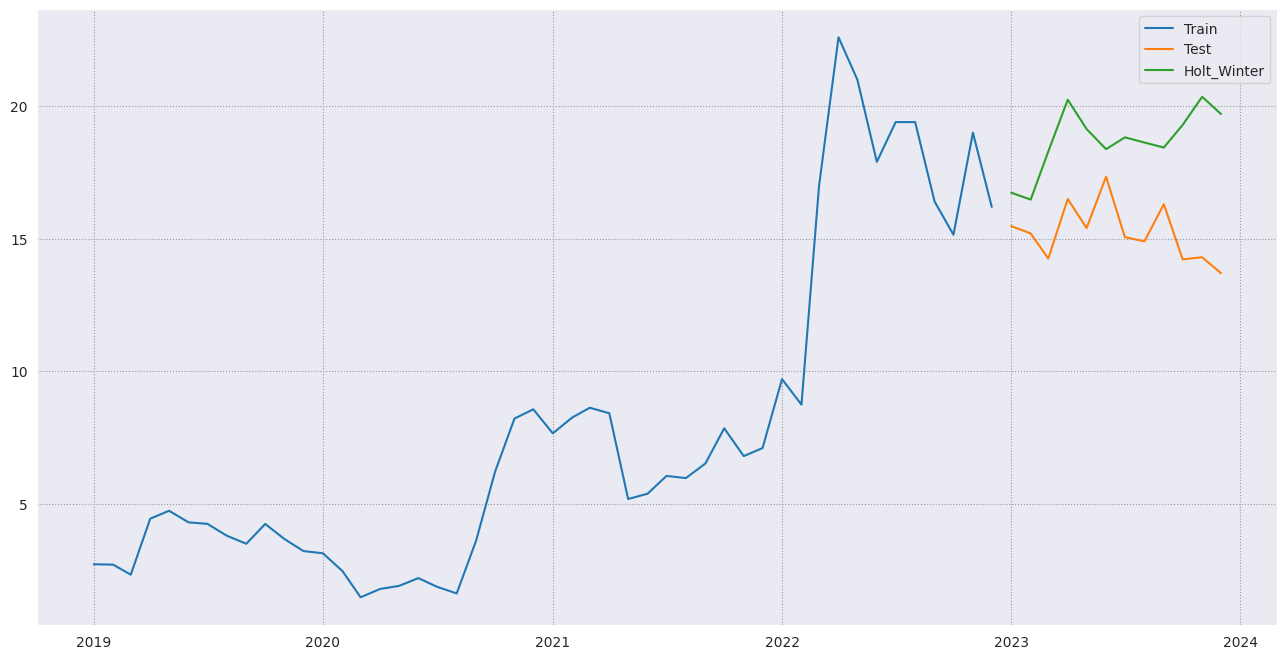

In [59]:
y_hat_avg = test_set2.copy()
fit1 = ExponentialSmoothing(np.asarray(train_set2['Close Price']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
#fit1 = ExponentialSmoothing(np.asarray(train['Number of Passengers']) ,seasonal_periods=12 ,trend='mul', seasonal='mul',).fit() # trend and seasonal multiplicative

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_set2))
plt.figure(figsize=(16,8))
plt.plot( train_set2['Close Price'], label='Train')
plt.plot(test_set2['Close Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set2['Close Price'], y_hat_avg['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['Holt_Winter'])/test_set2['Close Price'])*100,2)
mae  = np.round(np.mean(np.abs(test_set2['Close Price']-y_hat_avg['Holt_Winter'])),2)

results = pd.DataFrame({'Method':['Holt Winter'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Winter,3.87,3.49,23.57
